In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [24]:
df0 = pd.read_csv(r'C:\Users\Johannes\Documents\Uni\Master\Tech_Labs\ws24-skillswap\DS\01_Notebooks\03_Feature_Engineering\Activity_Projection_Encoded.csv')

df0.head()

,Agriculture,Animal Care,Art,Beauty,Dance,Music,Writing,Language,Health,Sports,Food,Technology,Photo,Video,Sum_Skills_Off,Sum_Skills_Off_ab_avg
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,11,1
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,6,0
2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,10,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,10,1


In [25]:
df1 = df0.drop(columns=["Sum_Skills_Off"], inplace=False)
df1.head()

,Agriculture,Animal Care,Art,Beauty,Dance,Music,Writing,Language,Health,Sports,Food,Technology,Photo,Video,Sum_Skills_Off_ab_avg
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [26]:
df1.shape

(800, 15)

## 1. Prepare training and test data 

In [27]:
X = df1.iloc[:, :-1]  
y = df1.iloc[:, -1:]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 2. Train KNN model

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=300)
knn.fit(X_train, y_train)

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=300)

In [78]:
knn.score(X_test, y_test)

0.48125

In [79]:
y_pred = knn.predict(X_test)

In [80]:
accuracy_score(y_pred, y_test)

0.48125

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 4, 75],
       [ 8, 73]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

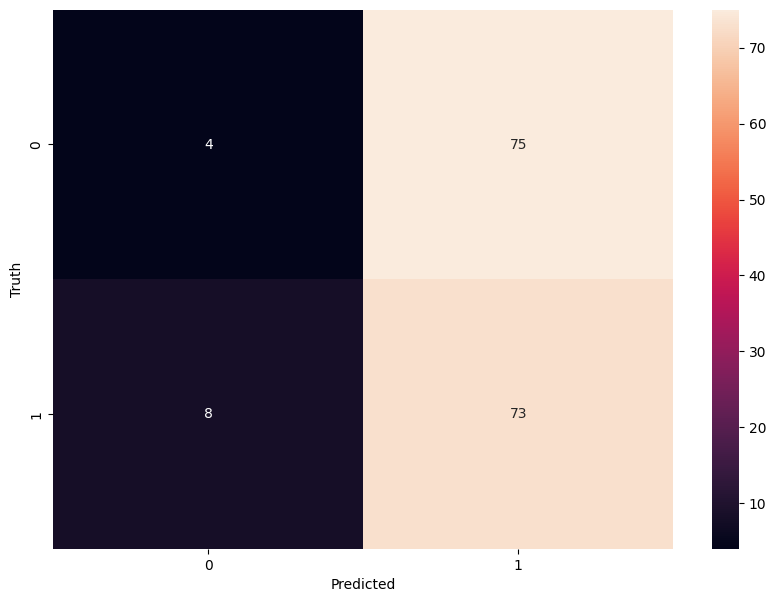

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.05      0.09        79
           1       0.49      0.90      0.64        81

    accuracy                           0.48       160
   macro avg       0.41      0.48      0.36       160
weighted avg       0.41      0.48      0.37       160



### 2.2 Hyperparamter tuning

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classificat

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


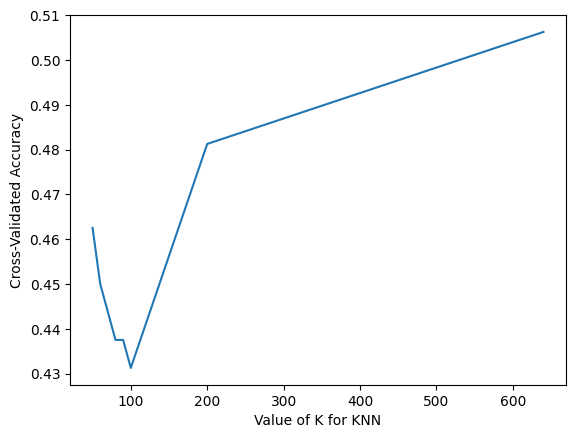

In [49]:
k_range = [50, 60, 70, 80, 90, 100, 200, 640]
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [50]:
# Find the maximum accuracy score
max_score = max(scores)

# Find the index (position) of the maximum score
max_index = scores.index(max_score)

# Find the corresponding value of K for the peak
peak_k_value = k_range[max_index]

peak_indices = [i for i, score in enumerate(scores) if score == max_score]
peak_k_values = [k_range[index] for index in peak_indices]

print("best performing K-values:", peak_k_values)

best performing K-values: [640]


In [51]:
import pandas as pd

df_peak_values = pd.DataFrame({'K_values': peak_k_values, 'Accuracy': [scores[k_range.index(peak_k_value)] for peak_k_value in peak_k_values]})

df_peak_values.transpose()


,0
K_values,640.00000
Accuracy,0.50625


### 2.3 Cross validation

In [52]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the K-Fold Cross-Validation object
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=640)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(knn, X, y, cv=kfold)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classificat

Cross-Validation Scores: [0.625  0.5    0.575  0.525  0.5125 0.525  0.5125 0.4875 0.5625 0.525 ]
Mean Accuracy: 0.535
Standard Deviation of Accuracy: 0.03905124837953327


In [55]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the K-Fold Cross-Validation object
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Instantiate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=200)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(knn, X, y, cv=kfold)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean accuracy and standard deviation of the scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classificat

Cross-Validation Scores: [0.5125 0.5    0.4375 0.5125 0.525  0.5375 0.45   0.4625 0.525  0.425 ]
Mean Accuracy: 0.48875
Standard Deviation of Accuracy: 0.038910956040683446


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## 3. Train a SVM

In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [57]:
# Initialize SVM classifier (you can choose the kernel and hyperparameters)
svm_clf = SVC(kernel='rbf', C=1.0, gamma= 0.0001)

# Train the SVM model
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.50625


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 3.1 Hyperparamter tuning

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


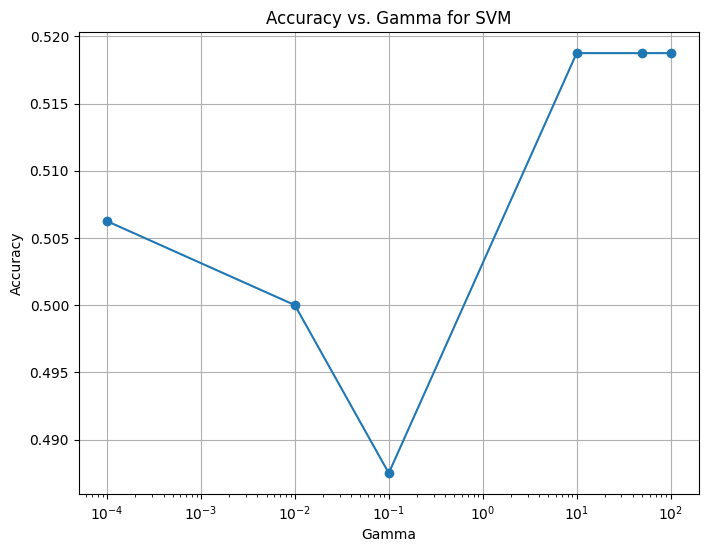

In [63]:
# Define gamma values to try
gamma_values = [0.0001, 0.01, 0.1, 10, 50, 100]

# Initialize lists to store gamma values and corresponding accuracies
gamma_list = []
accuracy_list = []

# Train SVM models with different gamma values
for gamma in gamma_values:
    svm_clf = SVC(kernel='rbf', gamma=gamma)
    svm_clf.fit(X_train, y_train)
    accuracy = svm_clf.score(X_test, y_test)
    gamma_list.append(gamma)
    accuracy_list.append(accuracy)

# Plot the accuracy vs. gamma
plt.figure(figsize=(8, 6))
plt.plot(gamma_list, accuracy_list, marker='o')
plt.title('Accuracy vs. Gamma for SVM')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.xscale('log')  # Use logarithmic scale for better visualization if gamma values are large
plt.grid(True)
plt.show()

In [65]:

# Define gamma values to try
gamma_values = [0.0001, 0.01, 0.1, 10, 50, 100,]

# Initialize lists to store gamma values and corresponding accuracies
gamma_list = []
accuracy_list = []

# Train SVM models with different gamma values
for gamma in gamma_values:
    svm_clf = SVC(kernel='rbf', gamma=gamma)
    svm_clf.fit(X_train, y_train)
    accuracy = svm_clf.score(X_test, y_test)
    gamma_list.append(gamma)
    accuracy_list.append(accuracy)

# Find the gamma value with the highest accuracy
best_gamma = gamma_list[accuracy_list.index(max(accuracy_list))]
best_accuracy = max(accuracy_list)

print("Best gamma value:", best_gamma)
print("Corresponding accuracy:", best_accuracy)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py

Best gamma value: 10
Corresponding accuracy: 0.51875


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py

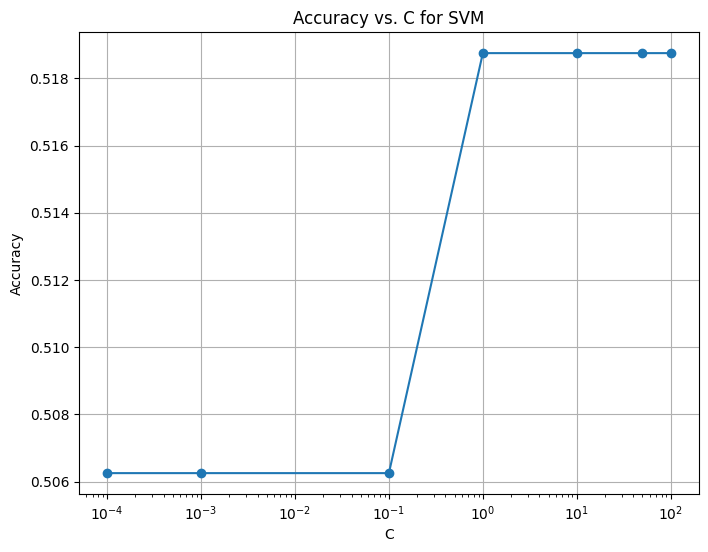

In [69]:
C_values = [0.0001, 0.001, 0.1, 1, 10, 50, 100]

C_list = []
accuracy_list = []

# Train SVM models with different C and gamma values
for C in C_values:
    svm_clf = SVC(kernel='rbf', C=C, gamma=10)
    svm_clf.fit(X_train, y_train)
    accuracy = svm_clf.score(X_test, y_test)
    C_list.append(C)
    accuracy_list.append(accuracy)

# Plot the accuracy vs. gamma
plt.figure(figsize=(8, 6))
plt.plot(C_list, accuracy_list, marker='o')
plt.title('Accuracy vs. C for SVM')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')  # Use logarithmic scale for better visualization if gamma values are large
plt.grid(True)
plt.show()

In [70]:
# Define C values to try
C_values = [0.0001, 0.001, 0.1, 1, 10, 50, 100]

# Initialize lists to store C values and corresponding accuracies
C_list = []
accuracy_list = []

# Train SVM models with different C values
for C in C_values:
    svm_clf = SVC(kernel='rbf', C=C, gamma=10)
    svm_clf.fit(X_train, y_train)
    accuracy = svm_clf.score(X_test, y_test)
    C_list.append(C)
    accuracy_list.append(accuracy)

# Find the C value with the highest accuracy
best_C = C_list[accuracy_list.index(max(accuracy_list))]
best_accuracy = max(accuracy_list)

print("Best C value:", best_C)
print("Corresponding accuracy:", best_accuracy)

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py

Best C value: 1
Corresponding accuracy: 0.51875


In [71]:
# Initialize SVM classifier (you can choose the kernel and hyperparameters)
svm_clf = SVC(kernel='rbf', C=1.0, gamma= 10)

# Train the SVM model
svm_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.51875


### 3.2 Cross validation

In [72]:
# Assuming X_train and y_train are your training data and labels
svm_clf = SVC(kernel='rbf', C=1.0, gamma= 0.0001)  # Initialize SVM model

# Perform cross-validation with 5-fold cross-validation
cv_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py

Cross-Validation Scores: [0.546875 0.546875 0.546875 0.546875 0.546875 0.546875 0.546875 0.53125
 0.53125  0.53125 ]
Mean Accuracy: 0.5421875
Standard Deviation of Accuracy: 0.007160274523368501


In [73]:
# Assuming X_train and y_train are your training data and labels
svm_clf = SVC(kernel='rbf', C=1.0, gamma= 10)  # Initialize SVM model

# Perform cross-validation with 5-fold cross-validation
cv_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())

c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py

Cross-Validation Scores: [0.484375 0.390625 0.5625   0.484375 0.546875 0.5625   0.59375  0.484375
 0.59375  0.5     ]
Mean Accuracy: 0.5203125
Standard Deviation of Accuracy: 0.06013087939029331


In [74]:
from sklearn.linear_model import LogisticRegression

# Assuming X_train and y_train are your training features and labels, respectively
# Create a logistic regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)


c:\Users\Johannes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [76]:

from sklearn.metrics import accuracy_score

predictions = logreg.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)

Accuracy: 0.43125
